# Stock prices

In [7]:
import numpy as np
import pandas as pd
import matplotlib
import requests
from datetime import datetime, timedelta

In [8]:
API_KEY = "FPHp0Fh2P1F0l0uj6bxGDq1KLWtawNON"

In [9]:
import pandas as pd

def fix_datetime_on_dataframe(df):
    # API'den gelen 't' kolonu Unix timestamp'tir (1970-01-01 referanslı zaman)
    # Massive/Polygon API timestamp'i milisaniye (ms) cinsinden verir.
    
    # 't' kolonunu gerçek datetime formatına çeviriyoruz.
    # origin='unix' → başlangıç 1970-01-01
    # unit='ms' → milisaniye bazlı dönüşüm
    df['date'] = pd.to_datetime(df['t'], origin='unix', unit='ms')
    
    # Oluşturduğumuz 'date' kolonunu index yapıyoruz.
    # Time series analizleri için datetime index kritik önemdedir.
    df = df.set_index('date')
    
    # Artık 't' kolonuna ihtiyacımız yok çünkü datetime'e dönüştürdük.
    df = df.drop(columns='t')
    
    # Düzenlenmiş DataFrame'i geri döndürüyoruz.
    return df

In [10]:
def fix_column_names_on_dataframe(df):
    mapping = {
        'o': 'open',
        'c': 'close',
        'h': 'high',
        'l': 'low',
        'n': 'number',
        'v': 'volume',
        'vw': 'avg_price'
    }
    return df.rename(columns=mapping)

In [11]:
def create_stock_df_of_company(company_code):
    company_code = company_code.upper()

    start_date = datetime.today() - timedelta(days=91)
    end_date = datetime.today() - timedelta(days=1)
    start = datetime.strftime(start_date, "%Y-%m-%d")
    end = datetime.strftime(end_date, "%Y-%m-%d")

    url = f"https://api.massive.com/v2/aggs/ticker/{company_code}/range/1/day/{start}/{end}?apiKey={API_KEY}"

    api_data = requests.get(url).json()

    df = pd.DataFrame(api_data['results'])

    df = fix_datetime_on_dataframe(df)
    df = fix_column_names_on_dataframe(df)
    df['company_code'] = company_code
    return df

In [12]:
apple_df = create_stock_df_of_company('AAPL')
apple_df.head()

,volume,avg_price,open,close,high,low,number,company_code
date,,,,,,,,
2025-11-25 05:00:00,46914220.0,277.9967,275.27,276.97,280.38,275.2500,667295,AAPL
2025-11-26 05:00:00,33431423.0,278.0466,276.96,277.55,279.53,276.6300,538937,AAPL
2025-11-28 05:00:00,20135620.0,277.6285,277.26,278.85,279.00,275.9865,369623,AAPL
2025-12-01 05:00:00,46587722.0,281.0702,278.01,283.10,283.42,276.1400,644276,AAPL
2025-12-02 05:00:00,53669532.0,285.5944,283.00,286.19,287.40,282.6301,682387,AAPL


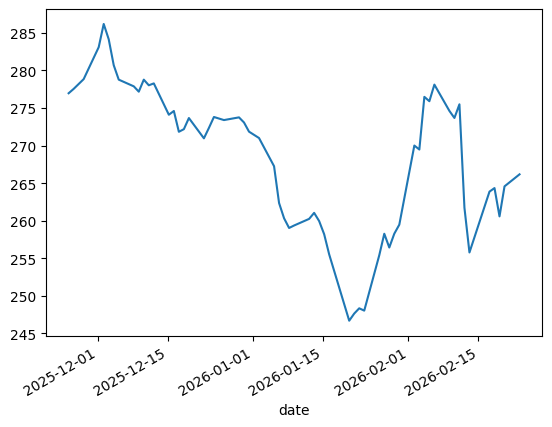

In [13]:
apple_df['close'].plot(kind='line');

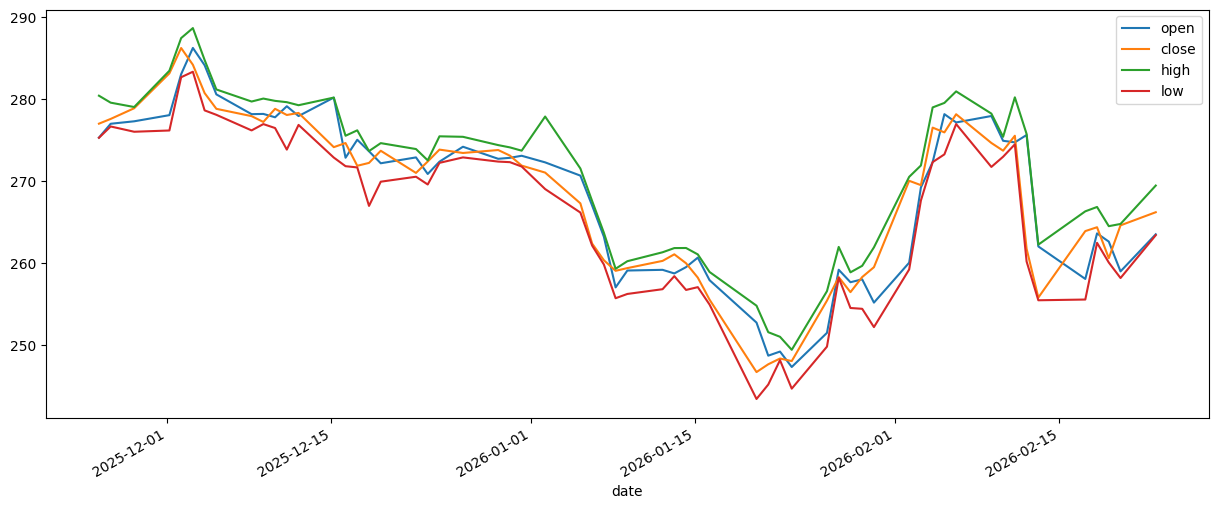

In [14]:
apple_df[['open', 'close', 'high', 'low']].plot(kind='line', figsize=(15,6));

In [15]:
from nbresult import ChallengeResult

result = ChallengeResult('apple',
    index_name=apple_df.index.name,
    index_type=apple_df.index.dtype,
    columns=apple_df.columns
)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /home/wit/.pyenv/versions/3.12.9/envs/workintech/bin/python
cachedir: .pytest_cache
rootdir: /home/wit/code/data-stock-market/tests
plugins: typeguard-4.4.2, anyio-4.8.0
collecting ... collected 3 items

test_apple.py::TestApple::test_apple_df_columns PASSED                   [ 33%]
test_apple.py::TestApple::test_apple_df_index_is_timestamp PASSED        [ 66%]
test_apple.py::TestApple::test_apple_df_index_name_is_date PASSED        [100%]

============================== 3 passed in 1.15s ===============================


💯 You can commit your code:

git add tests/apple.pickle

git commit -m 'Completed apple step'

git push origin master



In [16]:
# Set default figsize for all notebook (usefull in TS analysis)
matplotlib.rcParams['figure.figsize'] = (15, 6)

In [17]:
codes = ['AMZN', 'GOOGL', 'META']
stock_dfs = [apple_df]
for code in codes:
    stock_dfs.append(create_stock_df_of_company(code))

In [18]:
stocks_df = pd.concat(stock_dfs)
stocks_df.head()

,volume,avg_price,open,close,high,low,number,company_code
date,,,,,,,,
2025-11-25 05:00:00,46914220.0,277.9967,275.27,276.97,280.38,275.2500,667295,AAPL
2025-11-26 05:00:00,33431423.0,278.0466,276.96,277.55,279.53,276.6300,538937,AAPL
2025-11-28 05:00:00,20135620.0,277.6285,277.26,278.85,279.00,275.9865,369623,AAPL
2025-12-01 05:00:00,46587722.0,281.0702,278.01,283.10,283.42,276.1400,644276,AAPL
2025-12-02 05:00:00,53669532.0,285.5944,283.00,286.19,287.40,282.6301,682387,AAPL


<Axes: xlabel='date'>

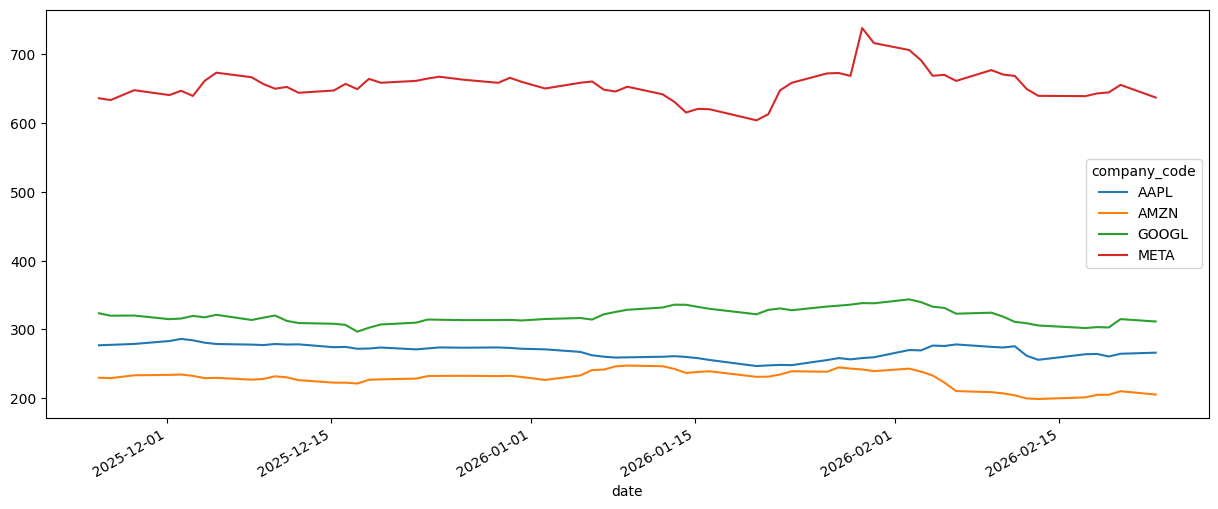

In [19]:
# Pivot the table to get company_code as columns
pivot_df = stocks_df.pivot(columns='company_code', values='close')
pivot_df.plot(kind='line')

In [20]:
def normalize(series):
    return series / series[0]

normalized_pivot = pivot_df.apply(normalize, axis=0)

/tmp/ipykernel_865/1697112155.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return series / series[0]


<Axes: xlabel='date'>

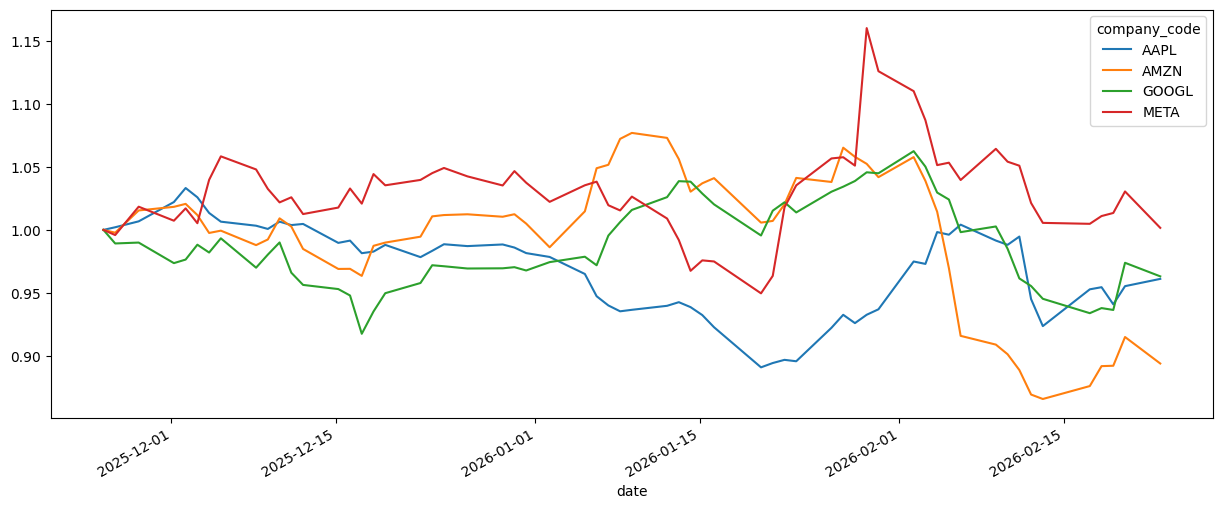

In [21]:
normalized_pivot.plot(kind='line')